In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import chardet
import string
import re

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [47]:
import nltk
nltk.download('punkt')

# For tokenizing words and sentences
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer, TweetTokenizer

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
file = "/content/drive/MyDrive/SoftCompA3/Dataset 3.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.99, 'encoding': 'utf-8', 'language': ''}

In [49]:
df = pd.read_csv(file,encoding='ISO-8859-1')

In [50]:
df

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [51]:
# Preprocessing

# make all lowercase
df['tweets']=df['tweets'].str.lower()

# remove punctuations
all_punc = string.punctuation
punc_lst = all_punc
def remove_punc(tweet):
    lst_char = list(tweet)
    cln_tweet = ""
    for item in lst_char:
      if item not in all_punc:
        cln_tweet += item
    return cln_tweet
df['tweets']= df['tweets'].apply(lambda twt: remove_punc(twt))

In [52]:
df

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [54]:
stopwords_lst = set(stopwords.words('english'))

In [55]:
# remove stop words
def remove_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in stopwords_lst])

df['tweets'] = df['tweets'].apply(lambda twt: remove_stopwords(twt))

In [56]:
df

,tweets,sentiment
0,real good moment missssssssss much,0
1,reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutub...,0
3,lapcat need send em accountant tomorrow oddly ...,0
4,add myspace myspacecomlookthunder,0
...,...,...
10309,depression g herbo mood im done stressing peop...,1
10310,depression succumbs brain makes feel like youl...,1
10311,ketamine nasal spray shows promise depression ...,1
10312,dont mistake bad day depression everyone em,1


In [57]:
def remove_URLs(tweet):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',tweet)
df['tweets'] = df['tweets'].apply(lambda x: remove_URLs(x))

In [58]:
df

,tweets,sentiment
0,real good moment missssssssss much,0
1,reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx http,0
3,lapcat need send em accountant tomorrow oddly ...,0
4,add myspace myspacecomlookthunder,0
...,...,...
10309,depression g herbo mood im done stressing peop...,1
10310,depression succumbs brain makes feel like youl...,1
10311,ketamine nasal spray shows promise depression ...,1
10312,dont mistake bad day depression everyone em,1


In [11]:
def remove_numbers(tweet):
    return re.sub('[0-9]+', '', tweet)
df['tweets'] = df['tweets'].apply(lambda x: remove_numbers(x))

In [12]:
# shuffle the dataset
df = df.sample(frac = 1) # shuffle

In [13]:
# tokenize
tokenizer = TweetTokenizer(r'w+')
df['tweets'] = df['tweets'].apply(tokenizer.tokenize)

In [14]:
st = nltk.PorterStemmer()
def stemming(data):
    text = [st.stem(word) for word in data]
    return text
df['tweets']= df['tweets'].apply(lambda x: stemming(x))

In [15]:
X=df['tweets']
y=df['sentiment']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 40)

In [17]:
len(X_train)

8251

In [18]:
len(X_test)

2063

In [20]:
# RNN
from collections import Counter
counter = Counter([words for reviews in X_train for words in reviews])
df = pd.DataFrame()
df['key'] = counter.keys()
df['value'] = counter.values()
df.sort_values(by='value', ascending=False, inplace=True)

# print (df.shape[0])
# print (df[:10000].value.sum()/df.value.sum())
# top_10k_words = list(df[:10000].key.values)
all_listed_words = list(df.key.values)

In [21]:
len(all_listed_words)

16760

In [22]:
def get_encoded_input(review):
    if len(review) > 500:
        review = review[:500]
    encoding = []
    for word in review:
        try:
            index = all_listed_words.index(word)
        except:
            index = 10000
        encoding.append(index)
    while len(encoding) < 500:
        encoding.append(10001)
    return encoding

In [23]:
training_data = np.array([get_encoded_input(review) for review in X_train])
testing_data = np.array([get_encoded_input(review) for review in X_test])
print (training_data.shape, testing_data.shape)

(8251, 500) (2063, 500)


In [24]:
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [25]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [26]:
import tensorflow
from tensorflow.keras.layers import Activation
 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=10002, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50, return_sequences=True))(data)
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(30, return_sequences=True))(data)
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(30, return_sequences=True))(data)

data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 32)           320064    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 100)          33200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 60)           31440     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 500, 60)           21840     
_________________________________________________________________
dense (Dense)                (None, 500, 1)            61        
_________________________________________________________________
activation (Activation)      (None, 500, 1)            0     

In [27]:
historySimpleRNN = model.fit(training_data, train_labels, epochs=15, batch_size=256, validation_data=(testing_data, test_labels))


Epoch 1/15
33/33 [==============================] - 37s 648ms/step - loss: 0.5554 - accuracy: 0.7771 - f1_m: 0.0129 - precision_m: 0.0079 - recall_m: 0.0362 - val_loss: 0.5422 - val_accuracy: 0.7698 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/15
33/33 [==============================] - 18s 556ms/step - loss: 0.5298 - accuracy: 0.7773 - f1_m: 0.5800 - precision_m: 0.5517 - recall_m: 0.8823 - val_loss: 0.5375 - val_accuracy: 0.7709 - val_f1_m: 1.2184 - val_precision_m: 0.8531 - val_recall_m: 2.2700
Epoch 3/15
33/33 [==============================] - 18s 550ms/step - loss: 0.5255 - accuracy: 0.7812 - f1_m: 1.6554 - precision_m: 0.9329 - recall_m: 10.5160 - val_loss: 0.4854 - val_accuracy: 0.8118 - val_f1_m: 1.8861 - val_precision_m: 0.9530 - val_recall_m: 94.3755
Epoch 4/15
33/33 [==============================] - 18s 551ms/step - loss: 0.2618 - accuracy: 0.9327 - f1_m: 1.8416 - precision_m: 0.9233 - recall_m: 386.5477 - val_loss: 0.2249 - val_a

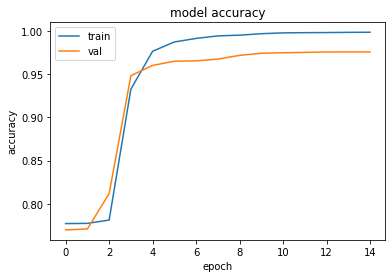

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(historySimpleRNN.history['accuracy'])
plt.plot(historySimpleRNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_acc.png')

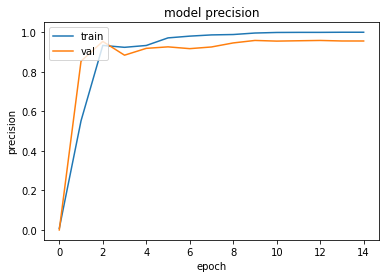

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(historySimpleRNN.history['precision_m'])
plt.plot(historySimpleRNN.history['val_precision_m'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_precision.png')

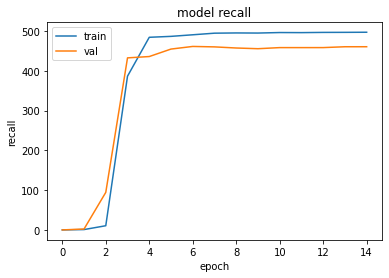

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(historySimpleRNN.history['recall_m'])
plt.plot(historySimpleRNN.history['val_recall_m'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_recall.png')

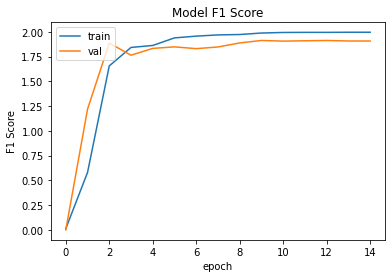

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(historySimpleRNN.history['f1_m'])
plt.plot(historySimpleRNN.history['val_f1_m'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_f1.png')